In [50]:
#liraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [51]:
#get data
iris = pd.read_csv("iris.csv")

In [52]:
#data information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
#data head
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
#drop unnecessary columns
iris.drop("Id", axis=1, inplace=True)

In [56]:
#target distributions
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [57]:
#data statistics
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[Text(0, 0.5, 'SepalLengthCm'),
 Text(0, 1.5, 'SepalWidthCm'),
 Text(0, 2.5, 'PetalLengthCm'),
 Text(0, 3.5, 'PetalWidthCm')]

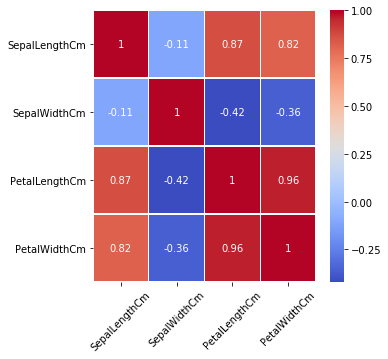

In [58]:
# correlation between numerical fields
plt.figure(figsize = (5,5))
ax = sns.heatmap(iris.corr(), annot=True, linewidths=.5, cmap = "coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels, rotation=0)

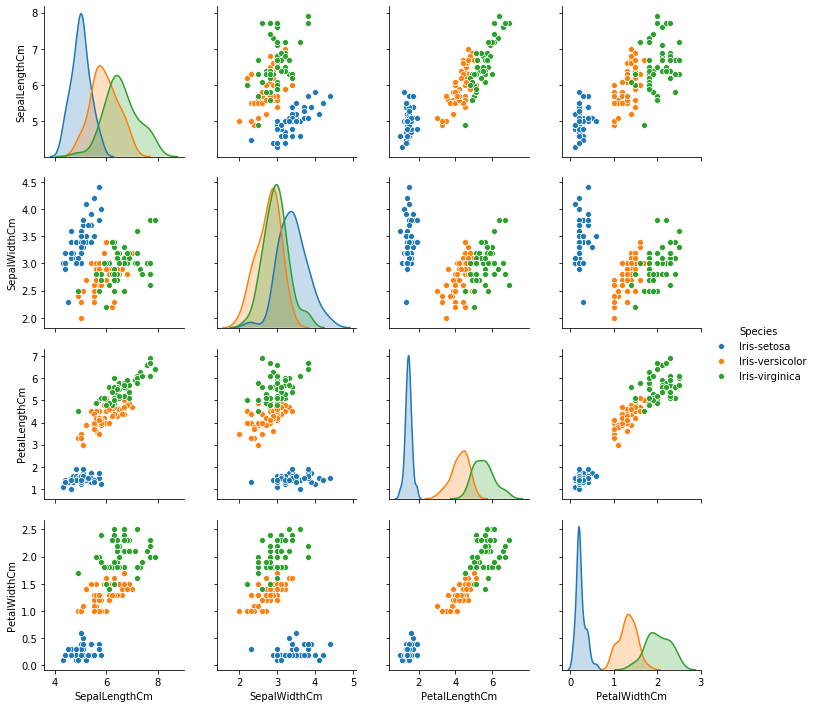

In [59]:
# correlation based on target values with scatter plot
sns.pairplot(iris, kind="scatter", hue="Species", diag_kind="kde")
plt.show()


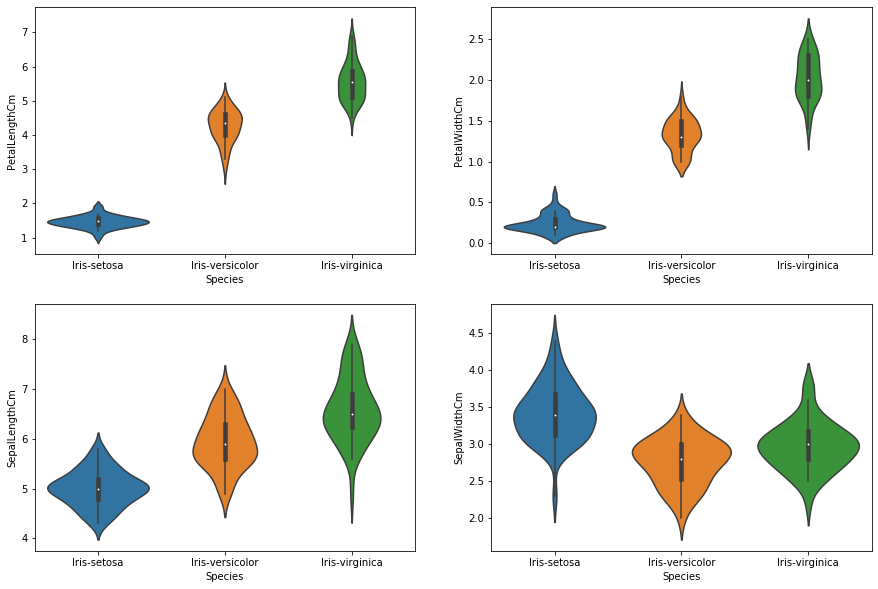

In [60]:
#target distribution with violin plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [61]:
iris["species_id"]=np.where(iris["Species"]=="Iris-setosa", 1, np.where(iris["Species"]=="Iris-versicolor", 2, 3)) 

In [64]:
# parallel plot for numerical fields statistic based on target
fig = px.parallel_coordinates(iris, color="species_id",
                              dimensions=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()